In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder



In [ ]:

# Load the data
data = pd.read_csv("/kaggle/input/mydata/MYDATA.csv")

# Define the input features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']


In [20]:

# Encode the categorical features
cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    data[feature] = cat_encoders[feature].fit_transform(data[feature])


In [21]:

# Define the embedding sizes for each categorical feature
embedding_sizes = [(len(cat_encoders[feature].classes_), min(50, (len(cat_encoders[feature].classes_) + 1) // 2)) for feature in cat_features]

# Define the input tensors
num_inputs = Input(shape=(len(num_features),))
cat_inputs = [Input(shape=(1,)) for i in range(len(cat_features))]


In [22]:

# Define the embedding layers for the categorical features
cat_embeddings = []
for i in range(len(cat_features)):
    cat_embedding = Embedding(input_dim=embedding_sizes[i][0], output_dim=embedding_sizes[i][1], name=f"{cat_features[i]}_embedding")(cat_inputs[i])
    cat_embedding = tf.squeeze(cat_embedding, axis=1)
    cat_embeddings.append(cat_embedding)


In [23]:

# Concatenate the input tensors
x = Concatenate()([num_inputs] + cat_embeddings)

# Define the output tensor
output = Dense(1, activation='linear')(x)

# Define the model
model = Model(inputs=[num_inputs] + cat_inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([data[num_features]] + [data[cat_feature].values for cat_feature in cat_features], data['PPG'], epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
752/752 [==============================] - 6s 5ms/step - loss: 2118.4478 - val_loss: 4.9443
Epoch 2/10
752/752 [==============================] - 4s 5ms/step - loss: 3.7408 - val_loss: 2.2885
Epoch 3/10
752/752 [==============================] - 4s 5ms/step - loss: 1.8304 - val_loss: 1.3910
Epoch 4/10
752/752 [==============================] - 4s 5ms/step - loss: 1.0777 - val_loss: 0.9186
Epoch 5/10
752/752 [==============================] - 4s 5ms/step - loss: 0.6910 - val_loss: 0.6464
Epoch 6/10
752/752 [==============================] - 4s 5ms/step - loss: 0.4775 - val_loss: 0.5233
Epoch 7/10
752/752 [==============================] - 4s 5ms/step - loss: 0.3336 - val_loss: 0.4669
Epoch 8/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2474 - val_loss: 0.3616
Epoch 9/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1916 - val_loss: 0.2700
Epoch 10/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1692 - val_loss: 0.2

Epoch 1/10
752/752 [==============================] - 5s 6ms/step - loss: 0.2001 - val_loss: 0.5795
Epoch 2/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2222 - val_loss: 0.1911
Epoch 3/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2002 - val_loss: 0.1892
Epoch 4/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2053 - val_loss: 0.2804
Epoch 5/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2166 - val_loss: 0.2053
Epoch 6/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1882 - val_loss: 0.1836
Epoch 7/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1932 - val_loss: 0.1964
Epoch 8/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2004 - val_loss: 0.2405
Epoch 9/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2032 - val_loss: 0.1859
Epoch 10/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2004 - val_loss: 0.2015

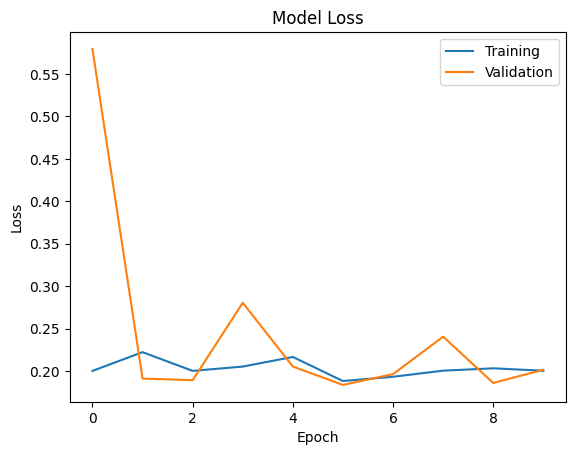

In [35]:
import matplotlib.pyplot as plt

# Train the model and store the history object
history = model.fit([data[num_features]] + [data[cat_feature].values for cat_feature in cat_features], data['PPG'], epochs=10, batch_size=32, validation_split=0.2)

# Plot the loss for validation and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a new DataFrame for prediction
new_data = pd.DataFrame({
    'age': [28],
    'position': ['Right Winger'],
    'Country': ['Spain'],
    'MarketValue': [5.0],
    'PreviousTeam': ['Barcelona'],
    'LeagueOfPreviousTeam': ['LaLiga'],
    'CountryOfPreviousTeam': ['Spain'],
    'Fee': [6.0],
    'YearOfTranfert': [2021],
    'NewTeam': ['Paris Saint-Germain'],
    'LeagueOfNewTeam': ['Ligue 1'],
    'CountryOfNewTeam': ['France'],
    'Height': [180],
    'Squad': [23],
    'Appearances': [30],
    #'PPG': [0.9],
    'Goals': [25],
    'Assists': [10],
    'OwnGoals': [0],
    'SubsON': [5],
    'SubsOFF': [2],
    'YellowCards': [2],
    'SecondYellowCards': [0],
    'RedCards': [1],
    'PenaltyGoals': [2],
    'MinutesPerGoal': [90],
    'MinutesPlayed': [2700]
})

# Define the categorical features
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']

cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    new_data[feature] = cat_encoders[feature].fit_transform(new_data[feature])
"""

# Load the label encoders
label_encoders = {}
for feature in cat_features:
    label_encoders[feature] = LabelEncoder()
    label_encoders[feature].fit(data[feature])
    new_data[feature] = label_encoders[feature].transform(new_data[feature])
"""
# Define the numerical features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']


# Load the standard scalers
standard_scalers = {}
for feature in num_features:
    standard_scalers[feature] = StandardScaler()
    standard_scalers[feature].fit(data[feature].values.reshape(-1, 1))
    new_data[feature] = standard_scalers[feature].transform(new_data[feature].values.reshape(-1, 1))

# Make the prediction
prediction = model.predict([new_data[num_features]] + [new_data[cat_feature].values for cat_feature in cat_features])
print(len(prediction))


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_2" expects 26 input(s), but it received 9 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 18) dtype=float64>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=int64>, <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=int64>]


In [28]:
# Find the index of the player with the highest predicted minutes played
index = prediction.argmax()
print(index)
# Get the name of the player with the highest predicted minutes played
player_name = data.iloc[index]['name']

print("The player with the highest predicted minutes played is:", player_name)


0
The player with the highest predicted minutes played is: Erling Haaland 


In [ ]:
# Get the top 3 player indices
top_player_indices = prediction.argsort()[0][-3:][::-1]
print(len(top_player_indices))
# Get the player names using the label encoders
player_names = []
for index in top_player_indices:
    player_name = data.iloc[index]['name']
    for feature in cat_features:
        player_feature_value = label_encoders[feature].inverse_transform([new_data[feature][0]])[0]
        if feature == 'position':
            player_feature_value = str(player_feature_value).replace('-', ' ')
        player_name += str(player_feature_value) 
    player_names.append(player_name.strip())

# Print the top 3 player names
print('Top 3 player names:')
for name in player_names:
    print(name)


In [ ]:
# Define the categorical features
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']

# Make the prediction
prediction = model.predict([new_data[num_features]] + [new_data[cat_feature].values for cat_feature in cat_features])

# Load the label encoders
label_encoders = {}
for feature in cat_features:
    label_encoders[feature] = LabelEncoder()
    label_encoders[feature].fit(data[feature])

# Convert the predicted labels to their original values
prediction_labels = []
for i, feature in enumerate(cat_features):
    labels = label_encoders[feature].inverse_transform(prediction[:, i].astype('int'))
    prediction_labels.append(labels)

# Concatenate the predicted labels
prediction_names = []
for i in range(len(prediction_labels[0])):
    name = ''
    for j in range(len(cat_features)):
        name += prediction_labels[j][i] + ' '
    prediction_names.append(name.strip())


In [37]:
# Make the prediction
n = 3  # Number of top indexes to return
prediction = model.predict([new_data[num_features]] + [new_data[cat_feature].values for cat_feature in cat_features])
prediction_indexes = (-prediction).argsort()[:n]

# Get the names of the top players
prediction_labels = [data.iloc[index]['name'] for index in prediction_indexes]
print(prediction_labels)

1/1 [==============================] - 0s 33ms/step
[0    Erling Haaland 
Name: name, dtype: object]


# MODEL3 PREDICTION


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv("/kaggle/input/mydata/MYDATA.csv")

# Define the input features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']

# Encode the categorical features
cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    data[feature] = cat_encoders[feature].fit_transform(data[feature])

# Define the embedding sizes for each categorical feature
embedding_sizes = [(len(cat_encoders[feature].classes_), min(50, (len(cat_encoders[feature].classes_) + 1) // 2)) for feature in cat_features]

# Define the input tensors
num_inputs = Input(shape=(len(num_features),))
cat_inputs = [Input(shape=(1,)) for i in range(len(cat_features))]

# Define the embedding layers for the categorical features
cat_embeddings = []
for i in range(len(cat_features)):
    cat_embedding = Embedding(input_dim=embedding_sizes[i][0], output_dim=embedding_sizes[i][1], name=f"{cat_features[i]}_embedding")(cat_inputs[i])
    cat_embedding = tf.squeeze(cat_embedding, axis=1)
    cat_embeddings.append(cat_embedding)

# Concatenate the input tensors
x = Concatenate()([num_inputs] + cat_embeddings)

# Define the output tensor
output = Dense(1, activation='linear')(x)

# Define the model
model = Model(inputs=[num_inputs] + cat_inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([data[num_features]] + [data[cat_feature].values for cat_feature in cat_features], data['PPG'], epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
752/752 [==============================] - 5s 5ms/step - loss: 923.2574 - val_loss: 0.9924
Epoch 2/10
752/752 [==============================] - 4s 5ms/step - loss: 0.8628 - val_loss: 0.6276
Epoch 3/10
752/752 [==============================] - 4s 5ms/step - loss: 0.5303 - val_loss: 0.4139
Epoch 4/10
752/752 [==============================] - 4s 5ms/step - loss: 0.3659 - val_loss: 0.3288
Epoch 5/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2611 - val_loss: 0.2476
Epoch 6/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1938 - val_loss: 0.2797
Epoch 7/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1658 - val_loss: 0.2011
Epoch 8/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1552 - val_loss: 0.2470
Epoch 9/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1484 - val_loss: 0.1910
Epoch 10/10
940/940 [==============================] - 2s 2ms/step


In [87]:
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7a277c3d98d0>>

Epoch 1/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1959 - val_loss: 0.2264
Epoch 2/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2042 - val_loss: 0.1853
Epoch 3/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2067 - val_loss: 0.2403
Epoch 4/10
752/752 [==============================] - 3s 5ms/step - loss: 0.2169 - val_loss: 0.2095
Epoch 5/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2211 - val_loss: 0.4391
Epoch 6/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1934 - val_loss: 0.2057
Epoch 7/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2159 - val_loss: 0.2664
Epoch 8/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2129 - val_loss: 0.2236
Epoch 9/10
752/752 [==============================] - 4s 5ms/step - loss: 0.2595 - val_loss: 0.1946
Epoch 10/10
752/752 [==============================] - 4s 5ms/step - loss: 0.1959 - val_loss: 0.2166

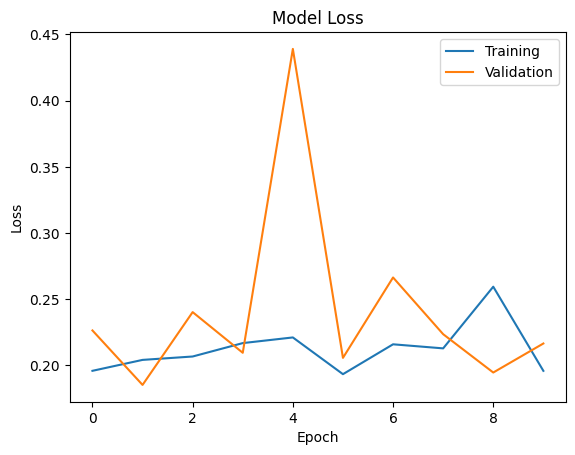

In [52]:

# Train the model and store the history object
history = model.fit([data[num_features]] + [data[cat_feature].values for cat_feature in cat_features], data['PPG'], epochs=10, batch_size=32, validation_split=0.2)

# Plot the loss for validation and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [62]:

# Make predictions and get top 3
predictions = model.predict([data[num_features]] + [data[cat_feature].values for cat_feature in cat_features])
top_3 = data.assign(Prediction=predictions.flatten()).sort_values('Prediction', ascending=False).head(10)

print(top_3[['name', 'Prediction']])


940/940 [==============================] - 2s 2ms/step
                      name  Prediction
8844               Neymar     2.909590
8510     Wellington Silva     2.856296
15750         Gareth Bale     2.691799
2986       Nemanja Motika     2.680409
10722  Zlatan Ibrahimovi?     2.648525
8846    Philippe Coutinho     2.618309
5169           Imam Jagne     2.609907
5498       Erling Haaland     2.564187
3609   Myles Peart-Harris     2.560077
14013       ?ngel Di Mar?     2.547603


In [61]:
predictions = model.predict([new_data[num_features]] + [new_data[cat_feature].values for cat_feature in cat_features])

# Print the top 3 predictions
top_3_indices = np.argsort(predictions.ravel())[:][::-1]
prediction_labels = [data.iloc[index]['name'] for index in top_3_indices]

print(prediction_labels)

1/1 [==============================] - 0s 51ms/step
['Erling Haaland ']


In [86]:
# Load the new data set
# Define the categorical features
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']

cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    new_data[feature] = cat_encoders[feature].fit_transform(new_data[feature])
"""

# Load the label encoders
label_encoders = {}
for feature in cat_features:
    label_encoders[feature] = LabelEncoder()
    label_encoders[feature].fit(data[feature])
    new_data[feature] = label_encoders[feature].transform(new_data[feature])
"""
# Define the numerical features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']


# Load the standard scalers
standard_scalers = {}
for feature in num_features:
    standard_scalers[feature] = StandardScaler()
    standard_scalers[feature].fit(data[feature].values.reshape(-1, 1))
    new_data[feature] = standard_scalers[feature].transform(new_data[feature].values.reshape(-1, 1))






# Make predictions on the new data
predictions = model.predict([new_data[num_features]] + [new_data[cat_feature].values for cat_feature in cat_features])
print('prediction are',prediction)
# Combine the predictions with the original data and sort by predicted PPG in descending order
#new_data['PPG'] = predictions
#new_data.sort_values('PPG', ascending=False, inplace=True)

# Return the top 3 players with the highest predicted PPG
#top_players = new_data.head(3)
#print(top_players.info())

prediction_index = (prediction).argsort()[:5]

prediction_labels = data.iloc[index]['name'] 
print(prediction_labels)
#prediction_labels = prediction_indexes['name']

1/1 [==============================] - 0s 37ms/step
prediction are [[47.650955]]
Erling Haaland 
